**Going to practice with motor data set from mne dataset example at *mne.datasets.fnirs_motor.data_path()***

This dataset contains a single subject recorded at Macquarie University. It has optodes placed over the motor cortex. 

**There are three conditions:**

1. tapping the left thumb to fingers

2. tapping the right thumb to fingers

3. a control where nothing happens

The tapping lasts 5 seconds, and there are 30 trials of each condition.

In [103]:
import os.path as op
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
from numpy.testing import assert_allclose

import mne
import pysnirf2

MODULE_PATH = op.join(os.getcwd(), 'mne_nirs\\__init__.py')
MODULE_NAME = 'mne_nirs'

import importlib
import sys
spec = importlib.util.spec_from_file_location(MODULE_NAME, MODULE_PATH)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module 
spec.loader.exec_module(module)



from mne.io import read_raw_nirx, read_raw_snirf
from mne_nirs.io import write_raw_snirf

NIRS can be performed using methods in continuous wave (CW) (constant illumination), time domain (TD) (pulsed illumination and time-resolved detection), or frequency domain (FD) (intensity-modulated illumination and phase-resolved detection). CW techniques are the most common.

In [104]:

#Get path to local copy of fnirs_motor dataset
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
print(fnirs_data_folder)

#returns path to file with data for 1st participant
#cw_amplitude means "continuous-wave amplitude"--i.e. the intensity
#of the light being shone doesn't change
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')


#read in NIRX fNIRS recording with path to the data
#documetation of Raw objects at https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose = True)

#load raw data
raw_intensity.load_data()


C:\Users\taubm\mne_data\MNE-fNIRS-motor-data
Loading C:\Users\taubm\mne_data\MNE-fNIRS-motor-data\Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>

Loading C:\Users\taubm\Desktop\mne-nirs\test_raw.snirf
Opening raw-browser...


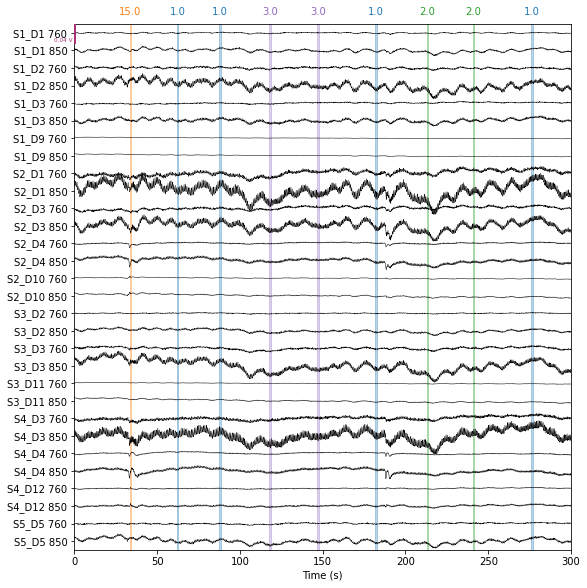

In [105]:
#write data from NIRX file to snirf file for mne-nirs package
write_raw_snirf(raw_intensity, 'test_raw.snirf')

#read back the new snirf file
snirf_intensity = read_raw_snirf('test_raw.snirf')

#make sure the data from the original file and the SNIRF file
#have the same values
assert_allclose(raw_intensity.get_data(), snirf_intensity.get_data())
snirf_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

In [106]:

# %%
# Validate SNIRF File
# -------------------
#
# To validate that a file complies with the SNIRF standard you should use the
# official SNIRF validator from the Boston University Neurophotonics Center
# called ``pysnirf2``. Detailed instructions for this program can be found at
# https://github.com/BUNPC/pysnirf2. Below we demonstrate that the files created
# by MNE-NIRS are compliant with the specification.

result = pysnirf2.validateSnirf('test_raw.snirf')
assert result.is_valid()
result.display()


Found 304 OK      (hidden)
Found 522 INFO    (hidden)
Found 0 WARNING
Found 0 FATAL  

File is VALID


### now I have the NIRX format (raw intensity) and the snirf format data (snirf_intensity)

can try different methods of plotting raw objects with
https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#tut-visualize-raw

raw.plots are interactive and I can label stuff on the plot!

Opening raw-browser...


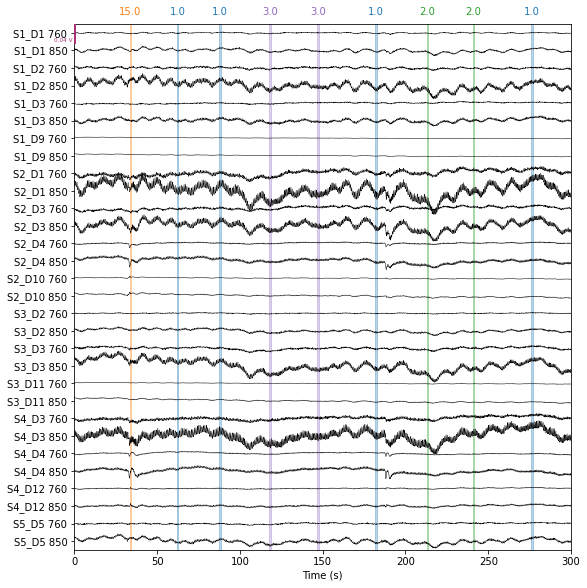

In [107]:
raw_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

based on the description of the experiment, "First, we attribute more meaningful names to the trigger codes which are stored as annotations. Second, we include information about the duration of each stimulus, which was 5 seconds for all conditions in this experiment. Third, we remove the trigger code 15, which signaled the start and end of the experiment and is not relevant to our analysis."


In [108]:
raw_intensity.annotations

<Annotations | 92 segments: 1.0 (30), 15.0 (2), 2.0 (30), 3.0 (30)>

In [109]:
raw_intensity.describe()

raw_intensity.annotations.set_durations(5)

#C = control, TL = tapping left, and TR = tapping right
raw_intensity.annotations.rename({'1.0': 'C',
                                  '2.0': 'TL',
                                  '3.0': 'TR'})

#C = control, TL = tapping left, and TR = tapping right
#raw_intensity.set_annotations(description = ['Start', 'C', 'TL', 'TR'])

#.rename(1.0':'Control',\
#                                 '2.0':'Tapping/Left',\
 #                                '3.0':'Tapping/Right'})

unwanted = np.nonzero(raw_intensity.annotations.description == '15.0')
raw_intensity.annotations.delete(unwanted)

<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>
ch  name        type                unit        min         Q1     median         Q3        max
 0  S1_D1 760   FNIRS_CW_AMPLITUDE  V          0.09       0.09       0.10       0.10       0.10
 1  S1_D1 850   FNIRS_CW_AMPLITUDE  V          0.17       0.19       0.19       0.19       0.21
 2  S1_D2 760   FNIRS_CW_AMPLITUDE  V          0.22       0.22       0.23       0.23       0.24
 3  S1_D2 850   FNIRS_CW_AMPLITUDE  V          0.58       0.61       0.61       0.62       0.65
 4  S1_D3 760   FNIRS_CW_AMPLITUDE  V          0.10       0.11       0.12       0.12       0.13
 5  S1_D3 850   FNIRS_CW_AMPLITUDE  V          0.26       0.28       0.29       0.30       0.32
 6  S1_D9 760   FNIRS_CW_AMPLITUDE  V          0.07       0.07       0.07       0.07       0.08
 7  S1_D9 850   FNIRS_CW_AMPLITUDE  V          0.11       0.11       0.11       0.12       0.13
 8  S2_D1 760   FNIRS_CW_AMPLITUDE  V          0.53       0.59  

Opening raw-browser...


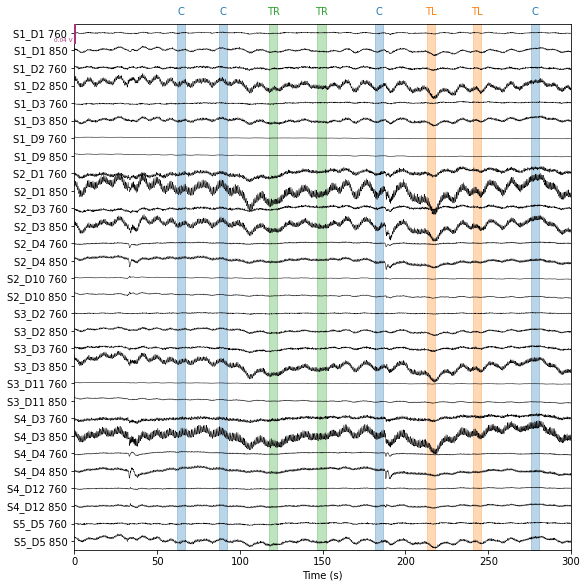

In [110]:
raw_intensity.plot(n_channels=30, duration=300, show_scrollbars=False);

In [111]:
#important: finally how to get the channel names
raw_intensity.ch_names

#to get all data
#raw_intensity._data

['S1_D1 760',
 'S1_D1 850',
 'S1_D2 760',
 'S1_D2 850',
 'S1_D3 760',
 'S1_D3 850',
 'S1_D9 760',
 'S1_D9 850',
 'S2_D1 760',
 'S2_D1 850',
 'S2_D3 760',
 'S2_D3 850',
 'S2_D4 760',
 'S2_D4 850',
 'S2_D10 760',
 'S2_D10 850',
 'S3_D2 760',
 'S3_D2 850',
 'S3_D3 760',
 'S3_D3 850',
 'S3_D11 760',
 'S3_D11 850',
 'S4_D3 760',
 'S4_D3 850',
 'S4_D4 760',
 'S4_D4 850',
 'S4_D12 760',
 'S4_D12 850',
 'S5_D5 760',
 'S5_D5 850',
 'S5_D6 760',
 'S5_D6 850',
 'S5_D7 760',
 'S5_D7 850',
 'S5_D13 760',
 'S5_D13 850',
 'S6_D5 760',
 'S6_D5 850',
 'S6_D7 760',
 'S6_D7 850',
 'S6_D8 760',
 'S6_D8 850',
 'S6_D14 760',
 'S6_D14 850',
 'S7_D6 760',
 'S7_D6 850',
 'S7_D7 760',
 'S7_D7 850',
 'S7_D15 760',
 'S7_D15 850',
 'S8_D7 760',
 'S8_D7 850',
 'S8_D8 760',
 'S8_D8 850',
 'S8_D16 760',
 'S8_D16 850']

### Select good channels

First we remove channels that are too close together (short channels) to detect a neural response (less than 1 cm distance between optodes). These short channels can be seen in the figure above. To achieve this we pick all the channels that are not considered to be short.

**channels too close together aren't good**

Opening raw-browser...


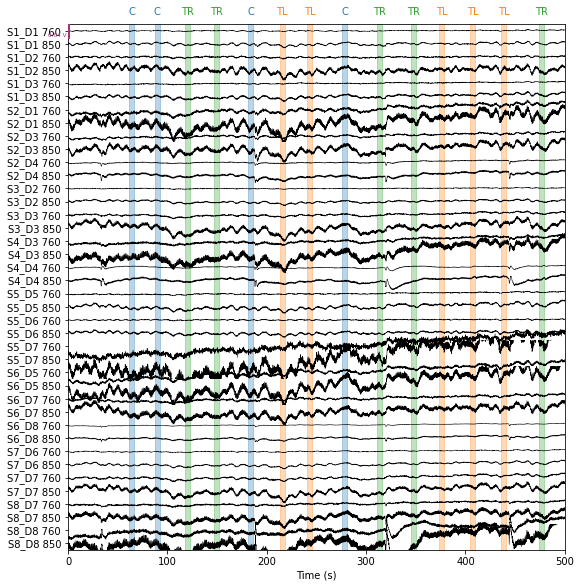

In [112]:
#picks_types picks the channels by type and name.
#here this picks all fnirs channels
picks = mne.pick_types(raw_intensity.info, fnirs=True)

#gives the distances between detectors
dists = mne.preprocessing.nirs.source_detector_distances(
    raw_intensity.info, picks=picks)

#selects the channels with detectors creater than 1 cm apart
raw_intensity.pick(picks[dists > 0.01])

#plot
raw_intensity.plot(n_channels=len(raw_intensity.ch_names),
                   duration=500, show_scrollbars=False);

Opening raw-browser...


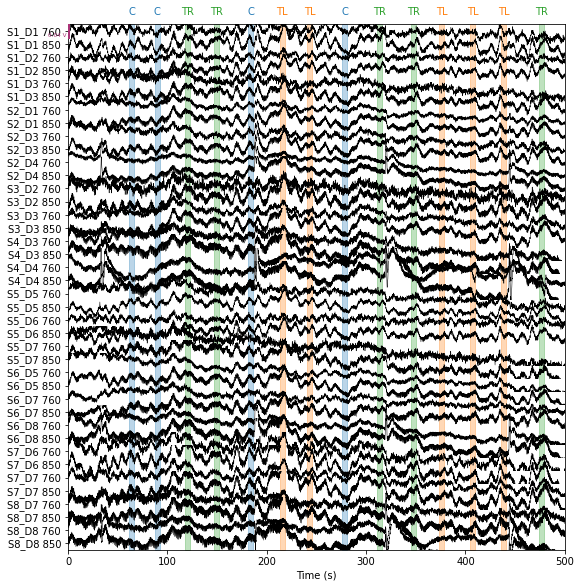

In [113]:
#to convert from "raw intensity" to "optical density",
#remove negative values--change to their absolute values
#and make sure all values are > 0

raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)

#^the function is at https://github.com/mne-tools/mne-python/blob/maint/0.24/mne/preprocessing/nirs/_optical_density.py
#It was harder to understand than I thought

#^maybe figure out how to do this

raw_od.plot(n_channels=len(raw_od.ch_names),
            duration=500, show_scrollbars=False);


# Now evaluate the data quality

### 1) Visual Inspection

Look for presence of physiological noise (heart rate) and motion artefacts (presence of baseline drift, baseline shift, and/or spike motion artefacts)



info about processing the data before analyzing it from file:///C:/Users/taubm/Downloads/brainsci-11-00606.pdf:

# Why use pre-processing and processing for raw fNIRS optical density data

**HRF = hemodynamic response function**

The primary goal of the pre-processing and processing of fNIRS data is to isolate
the hemodynamic changes occurring in the vascular network of the gray matter. This is
achieved by filtering raw data and estimating a HRF through modeling. These are referred
to as pre-processing and processing, respectively. **In pre-processing, the objective is toremove extraneous noise from the raw data.** Noise can be classified as either **systematic**
such as respiration, cardiac pulsation (heart rate), and changes in blood pressure. or **motion artefact (MA) noise** [9,22,23]. Noise removal techniques are applied prior to
the HRF estimation. **Frequently used pre-processing techniques include frequency filters,
wavelet, and smoothing filters.** Additionally, alternative methods such as **pre-whitening**
can be used. Once the raw data has undergone pre-processing, methods are used to convert
changes in light intensity to concentration changes in hemoglobin. **Processing is used to
compare baseline and task-related hemodynamic changes [24].** These can be separated
into either **general linear model (GLM) or non-GLM processing methods** such as block
averaging and linear mixed models.



# So now I'm going to do pre-processing to remove noise


## 1) first I'm going to look at systematic (regular & repeated) noise (e.g. heart rate, blood pressure, breathing)

### Going to do low-pass, high-pass, and bandpass filtering

**Note:** There are two general types of frequency filters for denoising: **infinite impulse response (IIR)** and
**finite impulse response (FIR) filters.** The mathematical equations for these two types
of filters differ in their filter coefficients, which are calculated as the ratio between the
sampling frequency of the system and the cutoff frequency of the filter. FIR filters has filter coefficients that only depend on the data inputs to the filter. IIR filters depend on both the input data at each point & the previous outputs of the filter from all points before that.

**Low-pass filter** get rid of or diminish frequencies above a certain value. This is used to get rid of high-frequency environmental noise like extra light, and physiological noise like cardiac pulsation and respiration.

High-pass filters get rid of or diminish frequencies below a certain value. This is used to get rid of low frequency noise, mainly from baseline drift (gradual movement of the optode sensors along the scalp). **use scalp coupling index to analyze baseline drift**

Band-pass filters get rid of/dimish frequencies outside of a specific range.

These filters are used in fNIRS to attenuate high- and low-frequency physiological
and instrumental noise.


To find best range for band-pass filter, applying a fast Fourier transform (FFT) to an fNIRS dataset will allow the researcher to visually inspect the data and determine the spectral location of noises within a dataset

### Use scalp coupling index analysis to look for baseline drift

In [114]:
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)

fig, ax = plt.subplots()
ax.hist(sci)

ax.set(xlabel = 'Scalp Coupling Index', ylabel = 'Count', xlim = [0,1])
plt.close('all')

then would take out channels with index below 0.5

In [115]:
raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.5))

### need to practice making my own band-pass filter

### note: The optical density or absorbance of a material is a logarithmic intensity ratio of the light falling upon the material, to the light transmitted through the material.

very good overview: https://sites.google.com/site/dosiatbli/theory/photon-migration

OD basically = (intensity of light hitting detector after going through brain)/(intensity of light before)

where intensity is power per unit surface area hitting the detector (watts/square meter)

calculated by photon flux

so the decreased power/unit area (or surface power density) of each wavelength light can be used to calculate the concentration of HbO2 and Hb


Two or more wavelengths are selected, with one wavelength above and one below the isosbestic point of 810 nm—at which deoxy-Hb and oxy-Hb have identical absorption coefficients. Using the modified Beer-Lambert law (mBLL), relative changes in concentration can be calculated as a function of total photon path length.


# of photons/
(a ratio of 

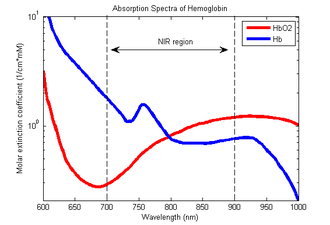

In fNIRS, photons of light are projected into the
scalp by the source optode and pass through the skull and into the upper cortical regions.
These photons are scattered and reflected as they travel through the head. Some of these
photons are absorbed by the chromophores of oxy-Hb and deoxy-Hb [4]. The photons
that are not absorbed are reflected and follow an elliptical path back to the surface of the
scalp. These photons are measured using the detector optode [4]. As the concentration
of oxy-Hb increases during neurovascular coupling, the intensity of the reflected light
decreases. This process is a result of an increase in light photon absorption from the increased concentration of oxy-Hb in the activated region. 




The modified Beer–Lambert law
is used to quantify changes in oxy-Hb and deoxy-Hb as a result of neurovascular coupling
(see Figure 1b). In this equation, optical density (OD) is equal to the negative log of the
attenuated light intensity (I) over the initial light intensity (I_0). (t) represents time and (λ)
represents the wavelength of light being used. This inverse relationship is equal to the
sum of the molar extinction coefficient (ε_i) multiplied by the concentration of hemoglobin
(c_i). These terms are multiplied by the differential pathlength factor (DPF), which accounts for the increase in distance that light travels due to light scatter, and the source-detector distance (d), where (i) represents all of the investigated chromophores. (G) represents the
intensity of light lost due to scattering. Additionally, this equation accounts for the scattering of the light photons [5–7]. Concentration changes are determined by taking the inverse log of the light that was projected into the scalp by the light that was detected. Water
is assumed to be a constant in this model as it will not change during neurovascular coupling.

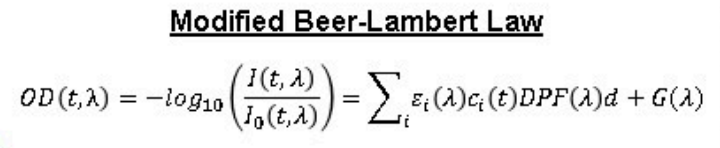

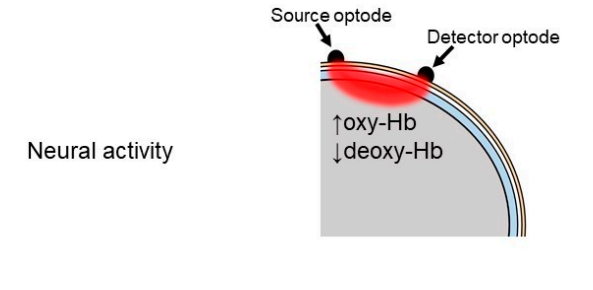

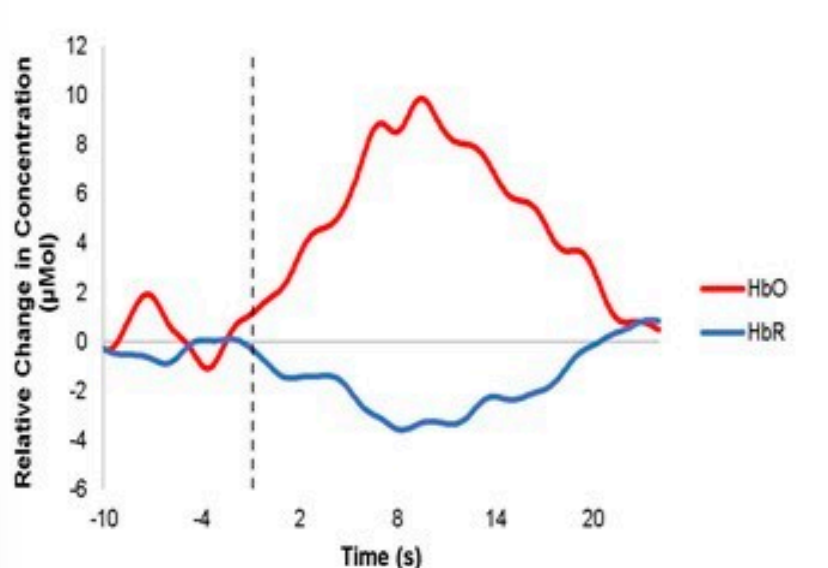

In [116]:
#first visually remove any spikes I see

Opening raw-browser...


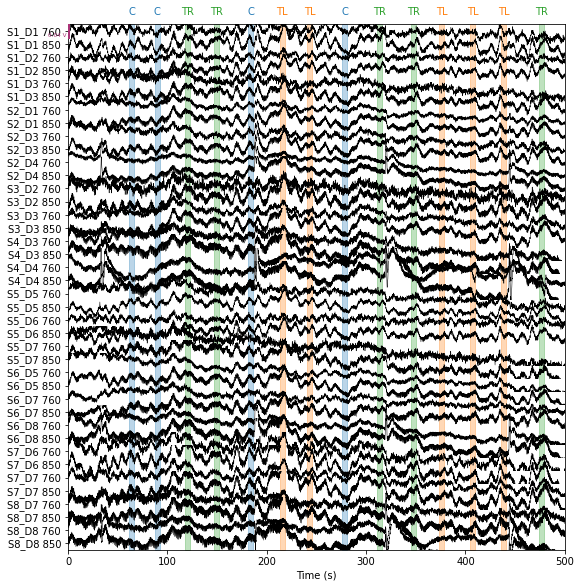

In [117]:

raw_od.plot(n_channels=len(raw_od.ch_names),
            duration=500, show_scrollbars=False);

To remove baseline shift and spike artifacts:

https://github.com/mne-tools/mne-python/blob/maint/0.24/mne/preprocessing/nirs/_tddr.py#L16-L56


based on paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6230489/

might use this for my filter:

*Although no definitive parameters have been defined in the
literature, Naseer and Hong [31] recommend a passband of 0.1~0.4 Hz to remove most
physiological and instrumental noises from fNIRS data if the task period is 10 s in length.*

baseline correction: Baseline correction was applied per trial where the mean of
the baseline was subtracted from each time point in the trial.

do analysis techniques from this thesis (simple): file:///C:/Users/taubm/Downloads/hue_dang%20(2).pdf

If I'm feeling ambitous I can make the TDDR algorithm

### Apply temporal derivative distribution repair

This approach corrects baseline shift and spike artifacts without the need for any user-supplied parameters

### come back to this to practice doing baseline correction myself

Opening raw-browser...


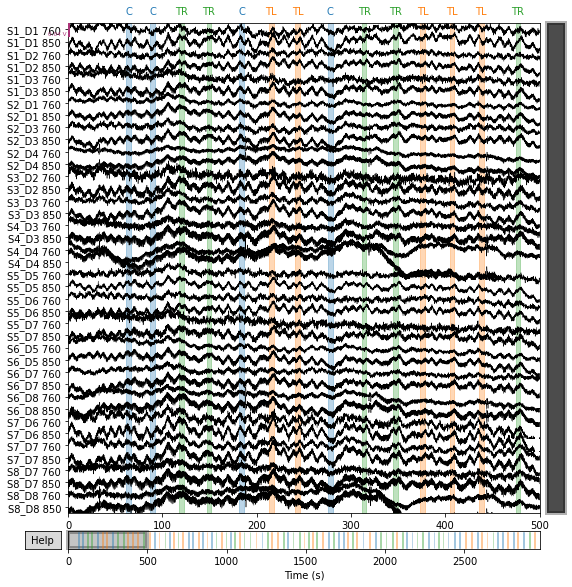

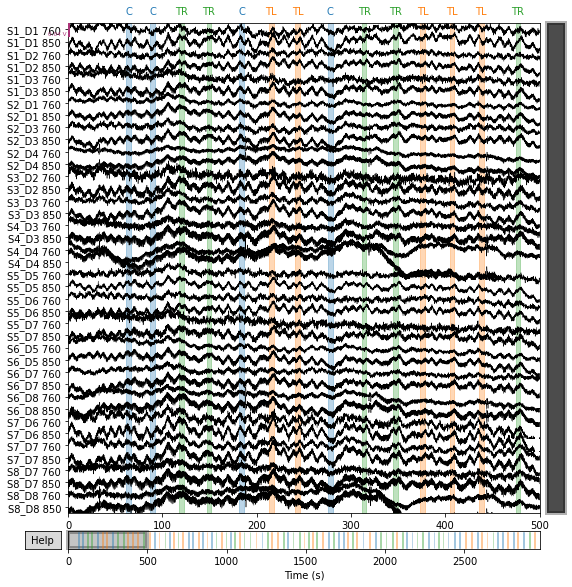

In [118]:
#adding this magic line makes the plot interactive!
#then I can add anotations/delete channels/more
#in the interactive mode more easily
#come back to this later to practice removing noise
#and practice starting from other formats and getting
#it into the form to use the mne package

#%matplotlib
from mne.preprocessing.nirs import (optical_density,
                                    temporal_derivative_distribution_repair)

corrected_od = temporal_derivative_distribution_repair(raw_od)

corrected_od.plot(n_channels=len(raw_od.ch_names),
            duration=500, show_scrollbars=True)

also use two papers above (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6230489/) and (file:///C:/Users/taubm/Downloads/hue_dang%20(2).pdf) to choose filter optical densities--> base it off of deviation from normal distribution (b/c systematic
stuff like heart rate is not independent/normally 
distributed).
 

### Good info for calculating modified beer-lambert law (MBLL) in fNIRS:
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.420.3077&rep=rep1&type=pdf


variable input into this calculation is the "PPF".

In the equation above for MBLL, there is the DPF. The differential pathlength factor (DPF) is the scaling factor that relates source-detector separations to the average path length light travels between the source and detector. The DPF is a function of wavelength and can be measured by time-domain and frequency-domain systems. Tabulated values existfor various tissues (Duncan et al., 1995; Essenpreis et al., 1993), although the values do vary across subjects and over time even for a given subject and tissue (Duncan et al., 1996). The notion of a DPF implies the assumption that the chromophore change is global to the sampling region. In contrast, the term partial pathlength factor (PPF) will refer to a similar scaling factor, but one that instead assumes a focal (local) change. **A PPF therefore represents a proportionality factor converting the source-detector separation into the average path length that light travels through a focal region of chromophore change. PPF is usually around 0.1 because the region of activity is ~10% of the sampling region.***



Even within the brain, while gray matter exhibits
substantial changes under functional loading, the activated
regions are commonly less than 1 cm across—a spatial scale
that is focal relative to the sampling region with sourcedetector separations ranging from 2 to 5 cm. Hence, the
activated region in this situation will constitute only a small
fraction—less than 10%—of the entire sampling region

In [119]:
picks = mne.pick_types(raw_intensity.info, fnirs=True)

#gives the distances between detectors
dists = mne.preprocessing.nirs.source_detector_distances(
    raw_intensity.info, picks=picks)

(0.005/dists).mean()

#okay it checks out if I put activated region at ~half a cm

0.13122063740908693

## info for theory of solving for the concentrations of Hb & Hbo2:
https://sites.google.com/site/dosiatbli/what-is-dosi-/absorption-spectroscopy-inverse

Use **linear algebra** setup & solve for concentration of Hb & HbO2 based on the total absorption & the absorption coefficients of the 2 substances & the wavelength. Use **method of least squares** to find the concentrations that would, in the theoretical equations, give the answer that best matches the data. (and take other causes for absorption/noise into account 

To account for light that is not absorbed, but **scattered**, as it goes through the brain, Kernel probably uses the inverse-doubling method & use an integrating sphere (the helmet) to collect all of the scattered light. So that the loss of intensity is not falsely attributed to absorption.

The **inverse-doubling method** generates estimates of light distributions in any biological tissue. This is basically done by simulating light going between 2 slabs of the tissue (absorbing and scattering). You need to already know what the general absorption constant & reflective properties are for a small layer. The the slabs are repeatedly doubled in thickness & simulated with light until desired thickness of the material is reached (doubling part). Then for the adding part, you do the same thing w/ one slab as a different material. then you can figure out info about the scattering vs absorption of the material.


Info about scattering is also helped by the integrating sphere measuring scattered light.

These simulations are very important for not having a lot of error in the Hb & HbO2 calculations.





Opening raw-browser...


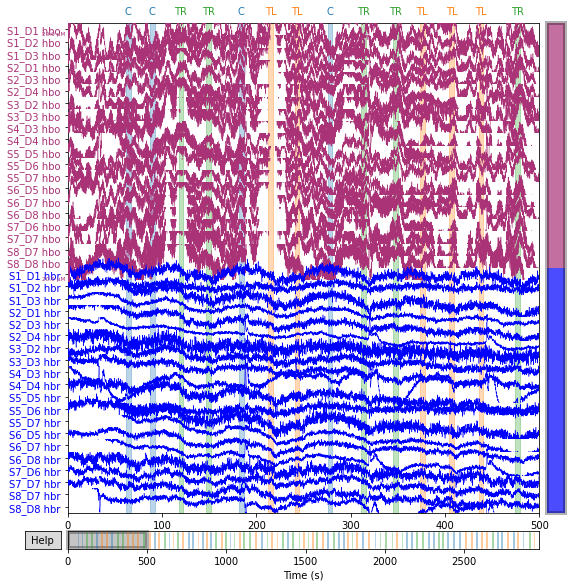

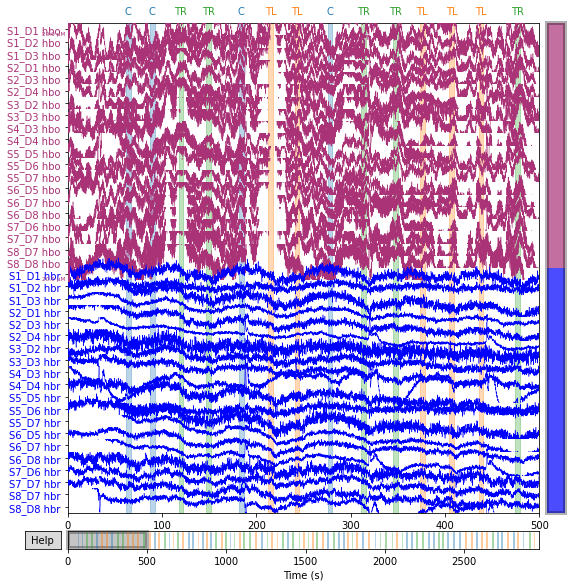

In [120]:
#convert from optical density data to haemoglobin
#concentratoin using modified Beer-Lambert law
#default if I don't enter ppf is ppf = 0.1
#%matplotlib

raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od, ppf = 0.1)

raw_haemo.plot(n_channels = len(raw_haemo.ch_names),
              duration = 500, show_scrollbars = True)

# Removing heart rate from signal

The haemodynamic response has frequency content predominantly below 0.5 Hz. **An increase in activity around 1 Hzcan be seen in the data that is due to the person's heart beat and is unwanted, so we use a low-pass filter to remove.**

**A high pass filter is also included to remove slow drifts in the data** like baseline drift (gradual movement of the optode sensors along the scalp)

### About Power Spectral Densities

very good overview: https://sites.google.com/site/dosiatbli/theory/photon-migration
 (Near-infrared spectroscopy (NIRS) provides a non-invasive and comparatively inexpensive modality for quantifying sub-surface tissue metabolism. Diffuse optical spectroscopic imaging (DOSI) and diffuse correlation spectroscopy (DCS) are model-based NIRS methods. DOSI and DCS are capable of measuring tissue oxygenation and blood flow, respectively.)
 
The key thing is that the the OD is logarithmic, so that an OD of 1 gives an attenuation factor of 10, and an OD of 2 is 100, and so on.  You may also see the ratio of the intensities expressed in a percent as the transmittance (T).

The main thing to remember is that the absorption coefficient is related to the strength of the absorber and the number density of the absorbers.
 

## Plot the power spectral densities across channels with plot_psd (built in plotting method for raw objects) code info

### (The fast fourier transfer thing I was trying to do!)

Plot the power spectral density across channels.

Different channel types are drawn in sub-plots. When the data have been processed with a bandpass, lowpass or highpass filter, dashed lines (╎) indicate the boundaries of the filter. The line noise frequency is also indicated with a dashed line (⋮).

input info, read at: https://mne.tools/stable/generated/mne.io.BaseRaw.html#mne.io.BaseRaw.plot_psd

raw_od.plot_psd(fmin=0, fmax=inf, tmin=None, tmax=None, proj=False, n_fft=None, n_overlap=0, reject_by_annotation=True, picks=None, ax=None, color='black', xscale='linear', area_mode='std', area_alpha=0.33, dB=True, estimate='auto', show=True, n_jobs=1, average=False, line_alpha=None, spatial_colors=True, sphere=None, window='hamming', exclude='bads', verbose=None)



### Parameters for plot_psd function

* **fmin** : float
        Start frequency to consider.

* **fmax** : float
        End frequency to consider.

* **tmin** : float | None
        Start time to consider.

* **tmax** : float | None
        End time to consider.

* **proj** : bool
        Apply projection.

* **n_fft** : int | None
        Number of points to use in Welch FFT calculations. Default is None, which uses the minimum of 2048 and the number of time points. (

* **n_overlap** : int
        The number of points of overlap between blocks. The default value is 0 (no overlap).

* **reject_by_annotation** : bool
        Whether to omit bad segments from the data before fitting. If True (default), annotated segments whose description begins with 'bad' are omitted. If False, no rejection based on annotations is performed. (Has no effect if inst is not a mne.io.Raw object)

* **picks** : str | list | slice | None
        Channels to include. Slices and lists of integers will be interpreted as channel indices. In lists, channel type strings (e.g., ['meg', 'eeg']) will pick channels of those types, channel name strings (e.g., ['MEG0111', 'MEG2623'] will pick the given channels. Can also be the string values “all” to pick all channels, or “data” to pick data channels. None (default) will pick good data channels. Note that channels in info['bads'] will be included if their names or indices are explicitly provided Cannot be None if ax is supplied.If both picks and ax are None separate subplots will be created for each standard channel type (mag, grad, and eeg).

* **ax** : instance of Axes | None
        Axes to plot into. If None, axes will be created.

* **color** :str | tuple
        A matplotlib-compatible color to use. Has no effect when spatial_colors=True.

* **xscale** : str
        Can be ‘linear’ (default) or ‘log’.

* **area_mode** : str | None
        Mode for plotting area. If ‘std’, the mean +/- 1 STD (across channels) will be plotted. If ‘range’, the min and max (across channels) will be plotted. Bad channels will be excluded from these calculations. If None, no area will be plotted. If average=False, no area is plotted.

* **area_alpha** :float
        Alpha for the area. I think this is a smoothing factor for the filter.

* **dB** : bool
        Plot Power Spectral Density (PSD), in units (amplitude**2/Hz (dB)) if dB=True, and estimate='power' or estimate='auto'. Plot PSD in units (amplitude**2/Hz) if dB=False and, estimate='power'. Plot Amplitude Spectral Density (ASD), in units (amplitude/sqrt(Hz)), if dB=False and estimate='amplitude' or estimate='auto'. Plot ASD, in units (amplitude/sqrt(Hz) (db)), if dB=True and estimate='amplitude'.

* **estimate** : str, {‘auto’, ‘power’, ‘amplitude’}
        Can be “power” for power spectral density (PSD), “amplitude” for amplitude spectrum density (ASD), or “auto” (default), which uses “power” when dB is True and “amplitude” otherwise.

* **show** : bool
        Show the figure if True.

* **n_jobs** : int
        The number of jobs to run in parallel (default 1). If -1, it is set to the number of CPU cores. Requires the joblib package.

* **average** : bool
        If False, the PSDs of all channels is displayed. No averaging is done and parameters area_mode and area_alpha are ignored. When False, it is possible to paint an area (hold left mouse button and drag) to plot a topomap.

* **line_alpha** : float | None
        Alpha for the PSD line. Can be None (default) to use 1.0 when average=True and 0.1 when average=False.

* **spatial_colors** : bool
        Whether to use spatial colors. Only used when average=False.

* **sphere** : float | array_like | str | None
        The sphere parameters to use for the cartoon head. Can be array-like of shape (4,) to give the X/Y/Z origin and radius in meters, or a single float to give the radius (origin assumed 0, 0, 0). Can also be a spherical ConductorModel, which will use the origin and radius. Can be “auto” to use a digitization-based fit. Can also be None (default) to use ‘auto’ when enough extra digitization points are available, and 0.095 otherwise. Currently the head radius does not affect plotting.

* **window** : str | float | tuple
        Windowing function to use. See scipy.signal.get_window().

* **exclude** : list of str | ‘bads’
        Channels names to exclude from being shown. If ‘bads’, the bad channels are excluded. Pass an empty list to plot all channels (including channels marked “bad”, if any).

* **verbose** : bool | str | int | None
        Control verbosity of the logging output. If None, use the default verbosity level. See the logging documentation and mne.verbose() for details. Should only be passed as a keyword argument.

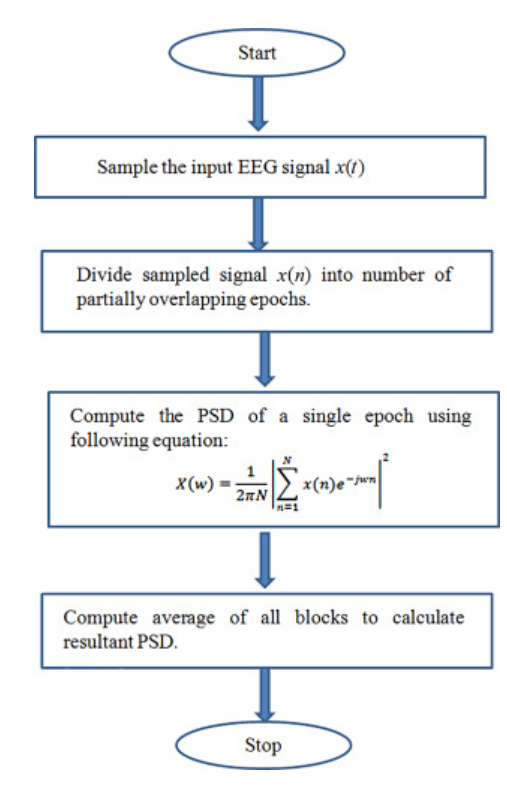

Effective window size : 262.144 (s)
Effective window size : 262.144 (s)


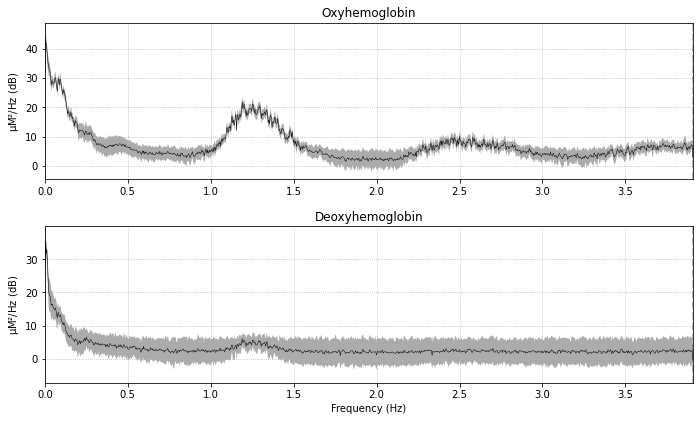

In [121]:
#plot figure before filtering

#gives distribution of power (energy/time)--how frequently
#do different intensity values occur
#(corresponding to different levels of hemoglobin 
# --> different changes in heamoglobin)


fig = raw_haemo.plot_psd(average = True)

fig.suptitle('Before filtering', 
             weight = 'bold', 
             size = 'x-large')

fig.subplots_adjust(top = 0.88)

plt.close('all')

filtering function: https://mne.tools/stable/generated/mne.io.BaseRaw.html#mne.io.BaseRaw.filter

raw.filter(l_freq, h_freq, picks=None, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto', n_jobs=1, method='fir', iir_params=None, phase='zero', fir_window='hamming', fir_design='firwin', skip_by_annotation=('edge', 'bad_acq_skip'), pad='reflect_limited', verbose=None)

Filters a subset of channels.

**Parameters**

* **l_freq** : float | None
            For FIR filters, the lower pass-band edge; for IIR filters, the lower cutoff frequency. If None the data are only low-passed.

* **h_freq** : float | None
            For FIR filters, the upper pass-band edge; for IIR filters, the upper cutoff frequency. If None the data are only high-passed.
        
        
* **l_trans_bandwidth** : float | str
            Width of the transition band at the low cut-off frequency in Hz (high pass or cutoff 1 in bandpass). Can be “auto” (default) to use a multiple of l_freq:
        min(max(l_freq * 0.25, 2), l_freq)
     Only used for method='fir'.
     
     
* **h_trans_bandwidth** : float | str
        Width of the transition band at the high cut-off frequency in Hz (low pass or cutoff 2 in bandpass). Can be “auto” (default in 0.14) to use a multiple of h_freq:
        
        min(max(h_freq * 0.25, 2.), info['sfreq'] / 2. - h_freq)

    Only used for method='fir'.
     

**The haemodynamic response has frequency content predominantly below 0.5 Hz.** An increase in activity around 1 Hz can be seen in the data that is due to the person’s heart beat and is unwanted. So we use a low pass filter to remove this. A high pass filter is also included to remove slow drifts in the data.

## NOTE ABOUT COMMON FREQUENCIES

Although no definitive parameters have been defined in the literature, Naseer and Hong [31] recommend a passband of 0.1~0.4 Hz to remove most physiological and instrumental noises from fNIRS data if the task period is 10 s in length.

This example filter is from 0.05 to 0.7

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.05 - 0.7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.02 Hz (-6 dB cutoff frequency: 0.04 Hz)
- Upper passband edge: 0.70 Hz
- Upper transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Filter length: 1291 samples (165.248 sec)

Effective window size : 262.144 (s)
Effective window size : 262.144 (s)


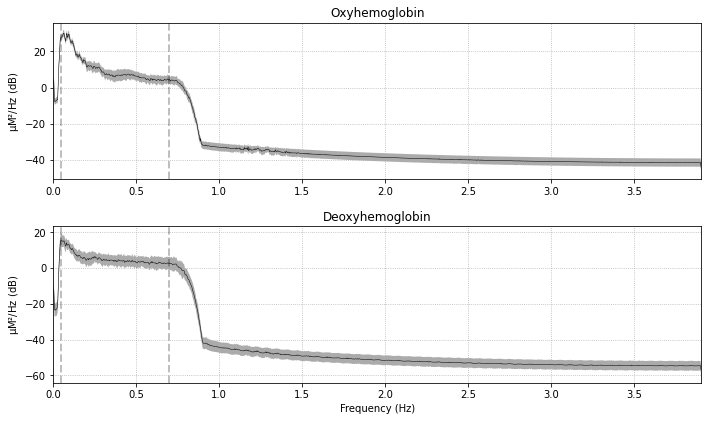

In [122]:
fig = raw_haemo.filter(0.05, 0.7, 
                       h_trans_bandwidth=0.2, 
                      l_trans_bandwidth=0.02)

fig = raw_haemo.plot_psd(average=True)
fig.suptitle('After filtering', weight='bold', size = 'x-large')
fig.subplots_adjust(top=0.88)
plt.close('all')

# Extracting epochs

Now that the signal has been converted to relative haemoglobin concentration, and the unwanted heart rate component has been removed, **we can extract epochs related to each of the experimental conditions.**

First we extract the events of interest and visualise them to ensure they are correct.

Used Annotations descriptions: ['Control', 'Tapping/Left', 'Tapping/Right']


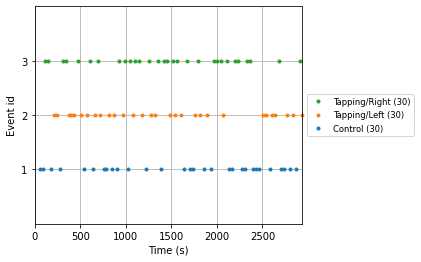

In [124]:
if not np.any(raw_haemo.annotations.description == 'Control'):
    raw_haemo.annotations.rename({'C': 'Control',
                                    'TL': 'Tapping/Left',
                                    'TR': 'Tapping/Right'})
events, event_dict = mne.events_from_annotations(raw_haemo)
fig = mne.viz.plot_events(events, event_id= event_dict,
                         sfreq=raw_haemo.info['sfreq'])

fig.subplots_adjust(right=0.7)

#fig.show()
plt.close('all')

## Corrections
Next we define the range of our epochs, the rejection criteria, baseline correction, and extract the epochs. We visualise the log of which epochs were dropped.

Peak-to-peak (pk-pk) is the difference between the maximum positive and the maximum negative amplitudes of a waveform, as shown below. 


good info for analysis: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7793571/

In [125]:
reject_criteria = dict(hbo=80e-6)
tmin, tmax = -5, 15

raw_haemo

#baseline correctoin was here

epochs = mne.Epochs(raw_haemo, events, event_id=event_dict,
                   tmin=tmin, tmax=tmax,
                   reject=reject_criteria, reject_by_annotation=True,
                   proj=True, baseline=(None, 0), preload=True,
                   detrend=None, verbose=True)

Not setting metadata
90 matching events found
Setting baseline interval to [-4.992, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 90 events and 157 original time points ...
    Rejecting  epoch based on HBO : ['S4_D4 hbo']
    Rejecting  epoch based on HBO : ['S4_D4 hbo', 'S8_D8 hbo']
    Rejecting  epoch based on HBO : ['S4_D4 hbo']
    Rejecting  epoch based on HBO : ['S4_D4 hbo', 'S8_D8 hbo']
    Rejecting  epoch based on HBO : ['S1_D1 hbo', 'S3_D3 hbo', 'S4_D4 hbo', 'S7_D6 hbo', 'S7_D7 hbo', 'S8_D8 hbo']
    Rejecting  epoch based on HBO : ['S4_D4 hbo', 'S6_D8 hbo', 'S8_D8 hbo']
6 bad epochs dropped


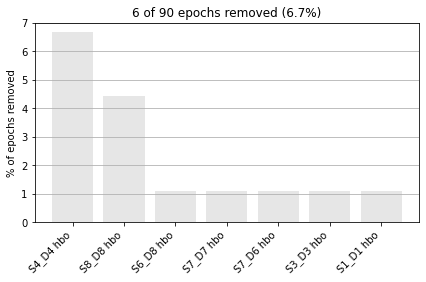

In [126]:
epochs.plot_drop_log()
plt.close('all')

# View consistency of responses across trials¶
### Now we can view the haemodynamic response for our tapping condition. 

We visualise the response for both the oxy- and deoxyhaemoglobin, and observe the expected peak in HbO at around 6 seconds consistently across trials, and the consistent dip in HbR that is slightly delayed relative to the HbO peak.

Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
55 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"
combining channels using "mean"


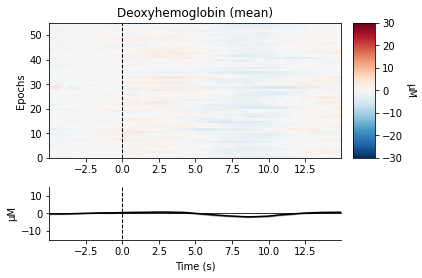

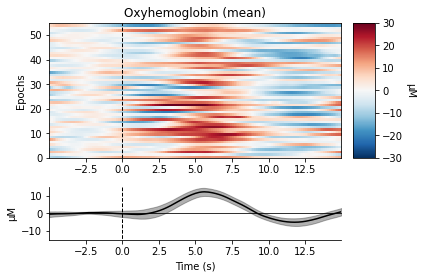

In [127]:
epochs['Tapping'].plot_image(combine='mean',
                             vmin=-30, vmax=30,
                            ts_args=dict(ylim=dict(hbo=[-15,15],
                                                  hbr=[-15,15])))

plt.close('all')

In [128]:
#epochs['Control']._data.shape

baseline--average the 5 second control trials
the value in the first column of events is the time they started

In [129]:
#event_dict

#epochs

In [130]:
#ind = np.where(events == 1)

#events.shape

#control_start = events[ind[0]][:,0]

#could get the mean of the controls thru this#come back to

### check control

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "mean"
combining channels using "mean"


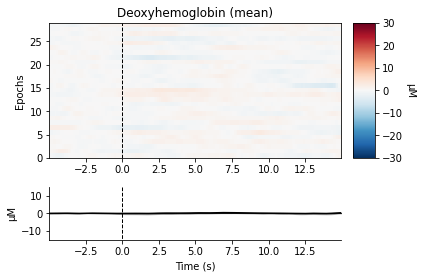

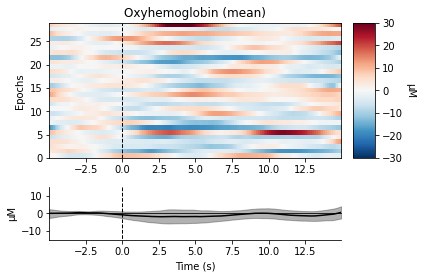

In [131]:
epochs['Control'].plot_image(combine='mean',
                            vmin=-30,
                            vmax = 30,
                            ts_args=dict(ylim=dict(hbo=[-15,15],
                                                  hbr=[-15,15])))

plt.close('all')

# View consistency of responses across channels

Similarly we can view how consistent the response is across the optode pairs that we selected. All the channels in this data are located over the motor cortex, and all channels show a similar pattern in the data.

In [132]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 6))
clims = dict

plt.close('all')

# Plot standard fNIRS response image


Next we generate the most common visualisation of fNIRS data: plotting both the HbO and HbR on the same figure to illustrate the relation between the two signals.

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


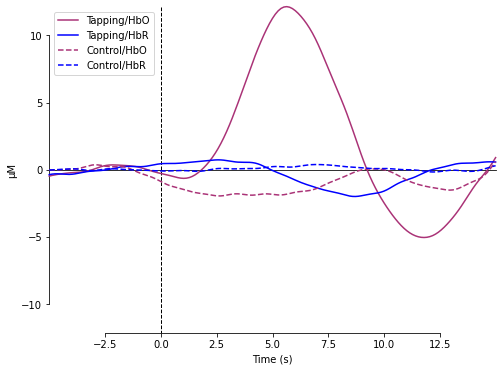

In [133]:
evoked_dict = {'Tapping/HbO': epochs['Tapping'].average(picks='hbo'),
               'Tapping/HbR': epochs['Tapping'].average(picks='hbr'),
               'Control/HbO': epochs['Control'].average(picks='hbo'),
               'Control/HbR': epochs['Control'].average(picks='hbr')}

# Rename channels until the encoding of frequency in ch_name is fixed
for condition in evoked_dict:
    evoked_dict[condition].rename_channels(lambda x: x[:-4])

color_dict = dict(HbO='#AA3377', HbR='b')
styles_dict = dict(Control=dict(linestyle='dashed'))

mne.viz.plot_compare_evokeds(evoked_dict, combine="mean", ci=0.95,
                             colors=color_dict, styles=styles_dict)

plt.close('all')

# View topographic representation of activity

Next we view how the topographic activity changes throughout the response.

No projector specified for this dataset. Please consider the method self.add_proj.


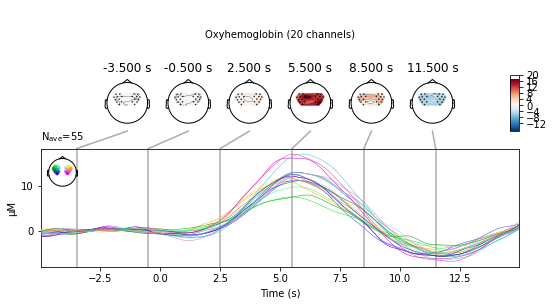

In [134]:
times = np.arange(-3.5, 13.2, 3.0)
topomap_args = dict(extrapolate='local')
epochs['Tapping'].average(picks='hbo').plot_joint(
    times=times, topomap_args=topomap_args)


plt.close('all')

# Compare tapping of left and right hands¶
Finally we generate topo maps for the left and right conditions to view the location of activity. First we visualise the HbO activity.

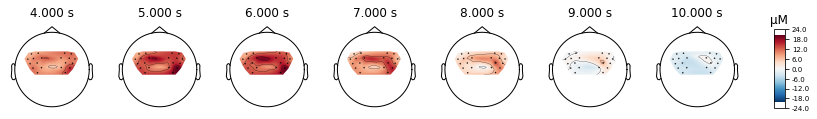

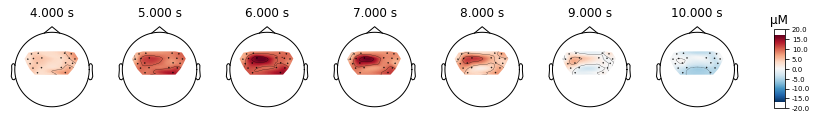

In [135]:
times = np.arange(4.0, 11.0, 1.0)
epochs['Tapping/Left'].average(picks='hbo').plot_topomap(
    times=times, **topomap_args)
epochs['Tapping/Right'].average(picks='hbo').plot_topomap(
    times=times, **topomap_args);


plt.close('all')

### And we also view the HbR activity for the two conditions.

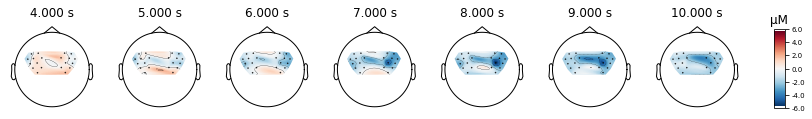

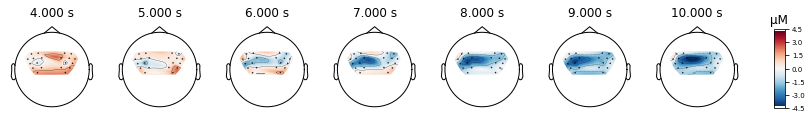

In [136]:
epochs['Tapping/Left'].average(picks='hbr').plot_topomap(
    times=times, **topomap_args)
epochs['Tapping/Right'].average(picks='hbr').plot_topomap(
    times=times, **topomap_args);


plt.close('all')

### And we can plot the comparison at a single time point for two conditions.

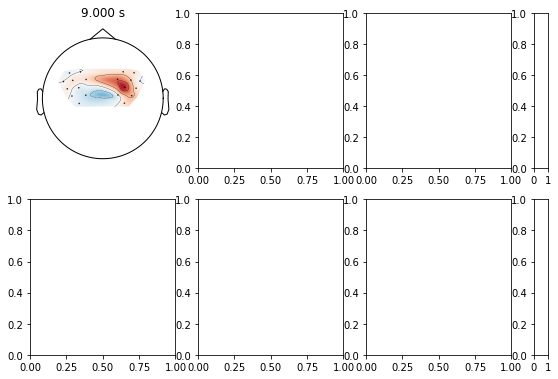

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(9, 5),
                         gridspec_kw=dict(width_ratios=[1, 1, 1, 0.1]))
vmin, vmax, ts = -8, 8, 9.0

evoked_left = epochs['Tapping/Left'].average()
evoked_right = epochs['Tapping/Right'].average()

evoked_left.plot_topomap(ch_type='hbo', times=ts, axes=axes[0, 0],
                         vmin=vmin, vmax=vmax, colorbar=False,
                         **topomap_args)
evoked_left.plot_topomap(ch_type='hbr', times=ts, axes=axes[1, 0],
                         vmin=vmin, vmax=vmax, colorbar=False,
                         **topomap_args)
evoked_right.plot_topomap(ch_type='hbo', times=ts, axes=axes[0, 1],
                          vmin=vmin, vmax=vmax, colorbar=False,
                          **topomap_args)
evoked_right.plot_topomap(ch_type='hbr', times=ts, axes=axes[1, 1],
                          vmin=vmin, vmax=vmax, colorbar=False,
                          **topomap_args)

evoked_diff = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])

evoked_diff.plot_topomap(ch_type='hbo', times=ts, axes=axes[0, 2:],
                         vmin=vmin, vmax=vmax, colorbar=True,
                         **topomap_args)
evoked_diff.plot_topomap(ch_type='hbr', times=ts, axes=axes[1, 2:],
                         vmin=vmin, vmax=vmax, colorbar=True,
                         **topomap_args)

for column, condition in enumerate(
        ['Tapping Left', 'Tapping Right', 'Left-Right']):
    for row, chroma in enumerate(['HbO', 'HbR']):
        axes[row, column].set_title('{}: {}'.format(chroma, condition))
fig.tight_layout()

plt.close('all')

Lastly, we can also look at the individual waveforms to see what is driving the topographic plot above.

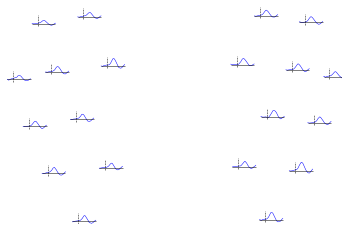

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
mne.viz.plot_evoked_topo(epochs['Left'].average(picks='hbo'), color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(epochs['Right'].average(picks='hbo'), color='r',
                         axes=axes, legend=False)

# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Left', 'Right'], loc='lower right')

plt.close('all')